### Summarizing Data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('colleges_train.csv')

print("Size:")
print(df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nSummary:")
print(df.describe())
print("\nData types:")
print(df.dtypes)

Size:
(400, 44)

First 5 rows:
                             name state  adm_rate  satv25  satv50  satv75  \
0             Sweet Briar College    VA      0.79     540     585     630   
1                   Salem College    NC      0.80     460     520     580   
2                Barry University    FL      0.51     480     515     550   
3  Texas A&M University-Texarkana    TX      0.94     480     530     580   
4           Blue Mountain College    MS      0.96     450     510     570   

   satm25  satm50  satm75  pell_grant_rate  ...  arch_deg  agri_deg  hist_deg  \
0     470     525     580           0.3065  ...       0.0       0.0    0.0385   
1     450     505     560           0.5469  ...       0.0       0.0    0.0455   
2     450     490     530           0.4832  ...       0.0       0.0    0.0000   
3     490     530     570           0.5153  ...       0.0       0.0    0.0377   
4     590     595     600           0.4865  ...       0.0       0.0    0.0692   

   socialsci_deg  h

### Visualizing Data

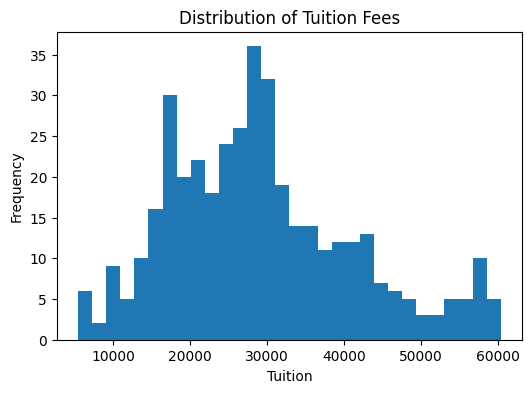

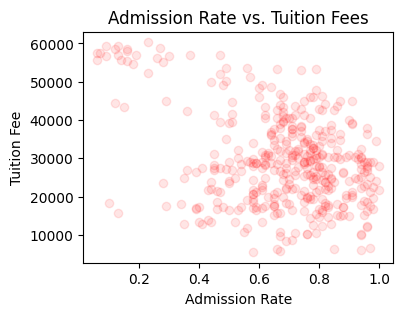

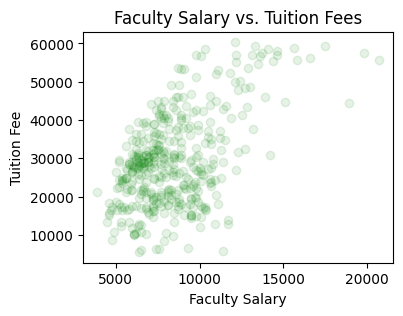

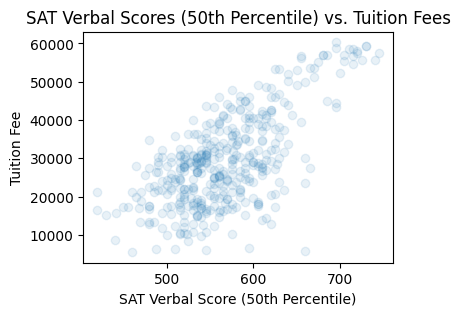

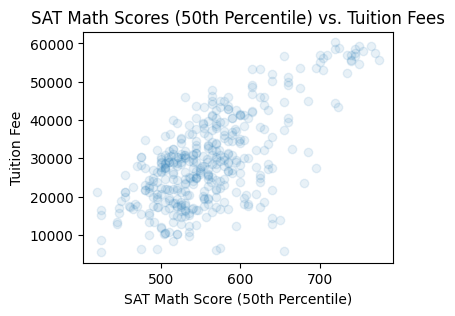

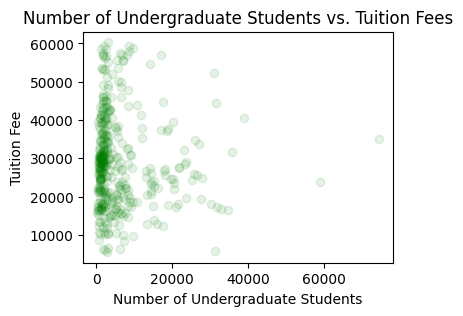

tuition             1.000000
satm50              0.675824
satv25              0.673051
satm25              0.670873
satv50              0.669078
satm75              0.663987
satv75              0.643582
roomboard           0.571710
faculty_salary      0.526310
socialsci_deg       0.478398
math_deg            0.398451
ug_asian            0.382989
sci_deg             0.346777
endowment           0.325808
bio_deg             0.305400
foreign_lang_deg    0.302114
hist_deg            0.194207
engl_deg            0.179146
compsci_deg         0.177002
engi_deg            0.145034
arch_deg            0.129496
ft_faculty_rate     0.093789
ug_white            0.071467
ug_men              0.052341
law_deg             0.047604
ug_hispanic         0.045230
psych_deg          -0.005251
comm_deg           -0.010800
business_deg       -0.021226
booksupply         -0.039244
ug                 -0.050171
ug_women           -0.052341
health_deg         -0.099685
agri_deg           -0.117020
fed_loan_rate 

In [18]:
#Distribution of Tuition Fees
df['tuition'].hist(bins=30, figsize=(6,4))
plt.title('Distribution of Tuition Fees')
plt.grid(False)
plt.xlabel('Tuition')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of Admission Rate vs Tuition Fees
plt.scatter(df['adm_rate'], df['tuition'], alpha=0.1, color='red')
plt.xlabel('Admission Rate')
plt.ylabel('Tuition Fee')
plt.title('Admission Rate vs. Tuition Fees')
plt.gcf().set_size_inches(4, 3)
plt.show()

# Scatter plot of Number of Faculty Salary vs Tuition Fees
plt.scatter(df['faculty_salary'], df['tuition'], alpha=0.1, color='green')
plt.xlabel('Faculty Salary')
plt.ylabel('Tuition Fee')
plt.title('Faculty Salary vs. Tuition Fees')
plt.gcf().set_size_inches(4, 3) 
plt.show()

# Scatter plot of SAT Verbal Scores (50th percentile) vs Tuition Fees
plt.scatter(df['satv50'], df['tuition'], alpha=0.1)
plt.xlabel('SAT Verbal Score (50th Percentile)')
plt.ylabel('Tuition Fee')
plt.title('SAT Verbal Scores (50th Percentile) vs. Tuition Fees')
plt.gcf().set_size_inches(4, 3)
plt.show()

# Scatter plot of SAT Math Scores (50th percentile) vs Tuition Fees
plt.scatter(df['satm50'], df['tuition'], alpha=0.1)
plt.xlabel('SAT Math Score (50th Percentile)')
plt.ylabel('Tuition Fee')
plt.title('SAT Math Scores (50th Percentile) vs. Tuition Fees')
plt.gcf().set_size_inches(4, 3)
plt.show()

# Scatter plot of Number of Undergraduate Students vs Tuition Fees
plt.scatter(df['ug'], df['tuition'], alpha=0.1, color='green')
plt.xlabel('Number of Undergraduate Students')
plt.ylabel('Tuition Fee')
plt.title('Number of Undergraduate Students vs. Tuition Fees')
plt.gcf().set_size_inches(4, 3) 
plt.show()

#Correlation matrix for any numerical features
df_numeric = df.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr()
print(correlation_matrix['tuition'].sort_values(ascending=False))



### Bootstrap 95% Confidence Interval for Tuition

In [9]:
def bootstrap_conf_interval(data, n_bootstrap=1000):
    bootstrap_samples = np.random.choice(data, size=(n_bootstrap, len(data)))
    means = np.mean(bootstrap_samples, axis=1)
    conf_interval = np.percentile(means, [2.5, 97.5])
    return conf_interval

tuition_fees = df['tuition'].values
conf_interval = bootstrap_conf_interval(tuition_fees)
print(f"95% confidence interval for  mean tuition fee: {conf_interval}")

95% confidence interval for  mean tuition fee: [28114.598375 30501.4975  ]


### Baseline Linear Regression Model

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#Baseline model using LR / need to check for multicollinearity esp for sat scores

#List of features used / should test features first
features = ['adm_rate', 'faculty_salary', 'satv50', 'satm50',]
X = df[features]
y = df['tuition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Creating the model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

#Predicting the tuition fees for the test set
y_pred = linreg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

#Calculating the RMSE
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#Calculating the baseline RMSE
baseline_rmse = np.sqrt(mean_squared_error(y_test, [y_train.mean()] * len(y_test)))

print(f"Test RMSE of linear regression: {test_rmse:.3f}   Baseline RMSE: {baseline_rmse:.3f}")

#Calculating R-squared for the test set
r_squared = 1 - (test_rmse ** 2) / (baseline_rmse ** 2)
print(f"Test R-squared of linear regression: {r_squared:.3f}")

Mean Squared Error: 70877975.94411357
Test RMSE of linear regression: 8418.906   Baseline RMSE: 13319.394
Test R-squared of linear regression: 0.600
